In [1]:
library(rstan)

Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.17.3, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)


In [2]:
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

In [30]:
cat(readChar("data//bayesian_lasso.stan", 1e3))

data {
  int N; //the number of observations
  int N2; //the size of the new_X matrix
  int K; //the number of columns in the model matrix
  real y[N]; //the response
  matrix[N,K] X; //the model matrix
  matrix[N2,K] new_X; //the matrix for the predicted values
}
parameters {
  vector[K] beta; //the regression parameters
  real sigma; //the standard deviation
}
transformed parameters {
  vector[N] linpred;
  linpred <- X*beta;
}
model {  
  beta[1] ~ cauchy(0,10); //prior for the intercept following Gelman 2008

  for(i in 2:K)
   beta[i] ~ cauchy(0,2.5);//prior for the slopes following Gelman 2008
  
  y ~ normal(linpred,sigma);
}
generated quantities {
  vector[N2] y_pred;
  y_pred <- new_X*beta; //the y values predicted by the model
}

In [37]:
dat<-data.frame(x1=runif(100,-2,2),x2=runif(100,-2,2))
X<-model.matrix(~x1*x2,dat)
betas<-runif(4,-1,1)
sigma<-1
y_norm<-rnorm(100,X%*%betas,sigma)

In [39]:
new_X<-model.matrix(~x1*x2,expand.grid(x1=seq(min(dat$x1),max(dat$x1),length=20),x2=c(min(dat$x2),mean(dat$x2),max(dat$x2))))

In [41]:
m_norm<-stan(file="data/bayesian_lasso.stan",
             data = list(N=100,N2=60,K=4,y=y_norm,X=X,new_X=new_X),
             pars = c("beta","sigma","y_pred"))

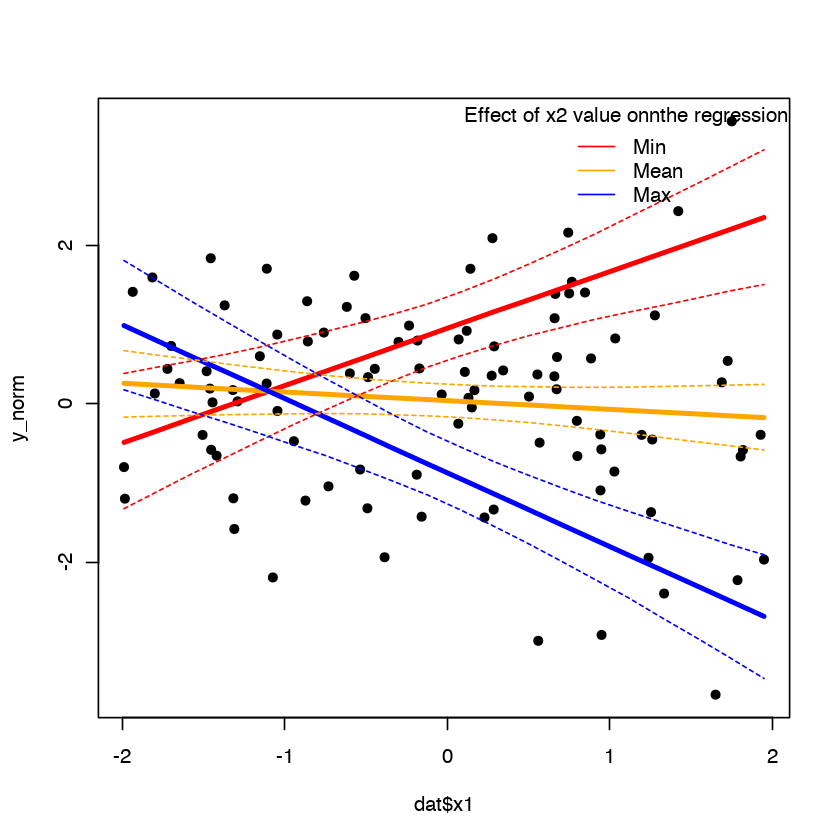

In [48]:
new_x<-data.frame(x1=new_X[,2],x2=rep(c("Min","Mean","Max"),each=20))
new_y<-extract(m_norm,pars="y_pred")
pred<-apply(new_y[[1]],2,quantile,probs=c(0.025,0.5,0.975)) #the median line with 95% credible intervals

#plot
plot(dat$x1,y_norm,pch=16)
lines(new_x$x1[1:20],pred[2,1:20],col="red",lwd=3)
lines(new_x$x1[1:20],pred[2,21:40],col="orange",lwd=3)
lines(new_x$x1[1:20],pred[2,41:60],col="blue",lwd=3)
lines(new_x$x1[1:20],pred[1,1:20],col="red",lwd=1,lty=2)
lines(new_x$x1[1:20],pred[1,21:40],col="orange",lwd=1,lty=2)
lines(new_x$x1[1:20],pred[1,41:60],col="blue",lwd=1,lty=2)
lines(new_x$x1[1:20],pred[3,1:20],col="red",lwd=1,lty=2)
lines(new_x$x1[1:20],pred[3,21:40],col="orange",lwd=1,lty=2)
lines(new_x$x1[1:20],pred[3,41:60],col="blue",lwd=1,lty=2)
legend("topright",legend=c("Min","Mean","Max"),lty=1,col=c("red","orange","blue"),bty = "n",title = "Effect of x2 value onnthe regression")

ci_level: 0.8 (80% intervals)
outer_level: 0.95 (95% intervals)
ERROR while rich displaying an object: Error in if (tag_pos == "manual") {: argument is of length zero

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(expr, pf)
14. eval(expr, pf)
15. print(obj)
16.

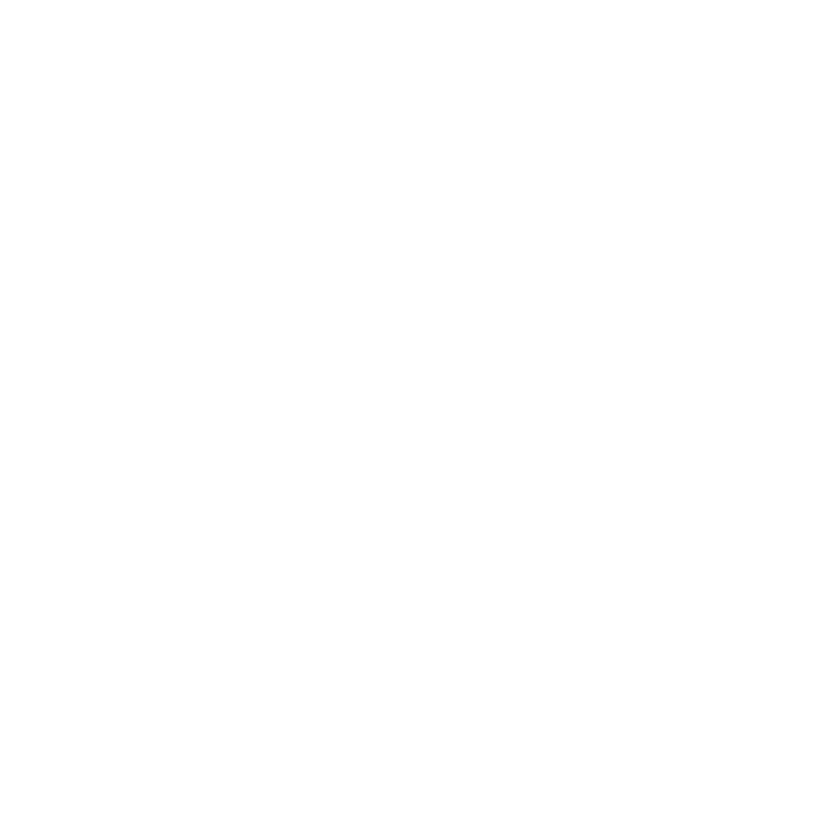

In [47]:
plot(m_norm,pars=c("beta","sigma"))

In [ ]:
la <- extract(fit, permuted = TRUE) # return a list of arrays 
mu <- la$mu

In [ ]:
### return an array of three dimensions: iterations, chains, parameters 
a <- extract(fit, permuted = FALSE) 

In [ ]:

### use S3 functions on stanfit objects
a2 <- as.array(fit)
m <- as.matrix(fit)
d <- as.data.frame(fit)